# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import scipy as lingregress 
import seaborn as sb 
# Impor the OpenWeatherMap API key
from api_keys import ap_k

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
api_key = "30b0a0c0639bef228216402f04668c40"

In [7]:
# Set the API base URL
url =" https://api.openweathermap.org/data/2.5/weather?"  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
   
    city_url = f"{url}q={city}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
 
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
              "City": city, 
              "Lat": city_lat, 
              "Lng": city_lng, 
              "Max Temp": city_max_temp,
              "Humidity": city_humidity,
              "Cloudiness": city_clouds,
              "Wind Speed": city_wind,
              "Country": city_country,
              "Date": city_date})


#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xichang
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | batagay
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | roma
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | mayo
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | jacareacanga
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | merke
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | garissa
Processing Record 19 of Set 1 | harper
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 2

Processing Record 36 of Set 4 | straseni
Processing Record 37 of Set 4 | da lat
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | barrow
Processing Record 40 of Set 4 | marawi
Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | puerto madero
Processing Record 44 of Set 4 | krasnoarmeysk
Processing Record 45 of Set 4 | moranbah
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | sambava
Processing Record 49 of Set 4 | nome
Processing Record 0 of Set 5 | sussex
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | halifax
Processing Record 3 of Set 5 | saskylakh
Processing Record 4 of Set 5 | evensk
Processing Record 5 of Set 5 | college
Processing Record 6 of Set 5 | les cayes
Processing Record 7 of Set 5 | whitehorse
Processing Record 8 of Set 5 | tenenkou
Processing Rec

Processing Record 25 of Set 8 | kyra
Processing Record 26 of Set 8 | kununurra
Processing Record 27 of Set 8 | wajid
Processing Record 28 of Set 8 | amuntai
Processing Record 29 of Set 8 | west lafayette
Processing Record 30 of Set 8 | adrar
Processing Record 31 of Set 8 | myanaung
Processing Record 32 of Set 8 | novoagansk
Processing Record 33 of Set 8 | soyo
Processing Record 34 of Set 8 | airai
Processing Record 35 of Set 8 | cascais
Processing Record 36 of Set 8 | chuy
Processing Record 37 of Set 8 | verkh-usugli
Processing Record 38 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 39 of Set 8 | lolua
City not found. Skipping...
Processing Record 40 of Set 8 | kot radha kishan
Processing Record 41 of Set 8 | tigil
Processing Record 42 of Set 8 | cherskiy
Processing Record 43 of Set 8 | udachnyy
Processing Record 44 of Set 8 | tura
Processing Record 45 of Set 8 | parauna
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | maldonado
Processing R

Processing Record 17 of Set 12 | alenquer
Processing Record 18 of Set 12 | corsicana
Processing Record 19 of Set 12 | nakhon thai
Processing Record 20 of Set 12 | terrace
Processing Record 21 of Set 12 | port moresby
Processing Record 22 of Set 12 | bosobolo
Processing Record 23 of Set 12 | susanville
Processing Record 24 of Set 12 | aljezur
Processing Record 25 of Set 12 | saint-joseph
Processing Record 26 of Set 12 | angoche
Processing Record 27 of Set 12 | warah
Processing Record 28 of Set 12 | tutoia
Processing Record 29 of Set 12 | debre tabor
Processing Record 30 of Set 12 | manzanillo
Processing Record 31 of Set 12 | manga
Processing Record 32 of Set 12 | sendai
Processing Record 33 of Set 12 | bosaso
Processing Record 34 of Set 12 | senno
Processing Record 35 of Set 12 | rockland
Processing Record 36 of Set 12 | san jose
Processing Record 37 of Set 12 | makokou
Processing Record 38 of Set 12 | esfahan
Processing Record 39 of Set 12 | sumbe
Processing Record 40 of Set 12 | port 

In [8]:
city_data_df = pd.DataFrame(city_data) 
city_data_df

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0        xichang  27.8964  102.2634    288.54        77           1   
1    yerbogachen  61.2767  108.0108    252.85       100          13   
2        batagay  67.6333  134.6333    265.79        97         100   
3       khatanga  71.9667  102.5000    253.15       100         100   
4           roma  43.2128  -75.4557    285.78        75         100   
..           ...      ...       ...       ...       ...         ...   
578       kawalu  -7.3817  108.2082    296.10        98          99   
579       aviles  43.5547   -5.9248    285.81        76           0   
580     vanavara  60.3400  102.2797    257.27        96          90   
581      erenhot  43.6475  111.9767    278.57        54          92   
582        arlit  18.7369    7.3853    303.18         8           0   

     Wind Speed Country        Date  
0          1.01      CN  1681763787  
1          0.43      RU  1681763787  
2          1.00      RU  1681763787  
3          3.54      RU  1681763787  
4          2.06      US  1681763788  
..          ...     ...         ...  
578        0.34      ID  1681763957  
579        5.66      ES  1681763959  
580        1.71      RU  1681763960  
581        3.48      CN  1681763960  
582        4.02      NE  1681763960  

[583 rows x 9 columns]

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      xichang  27.8964  102.2634    288.54        77           1        1.01   
1  yerbogachen  61.2767  108.0108    252.85       100          13        0.43   
2      batagay  67.6333  134.6333    265.79        97         100        1.00   
3     khatanga  71.9667  102.5000    253.15       100         100        3.54   
4         roma  43.2128  -75.4557    285.78        75         100        2.06   

  Country        Date  
0      CN  1681763787  
1      RU  1681763787  
2      RU  1681763787  
3      RU  1681763787  
4      US  1681763788

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0            xichang  27.8964  102.2634    288.54        77           1   
1        yerbogachen  61.2767  108.0108    252.85       100          13   
2            batagay  67.6333  134.6333    265.79        97         100   
3           khatanga  71.9667  102.5000    253.15       100         100   
4               roma  43.2128  -75.4557    285.78        75         100   

         Wind Speed Country        Date  
City_ID                                  
0              1.01      CN  1681763787  
1              0.43      RU  1681763787  
2              1.00      RU  1681763787  
3              3.54      RU  1681763787  
4              2.06      US  1681763788

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

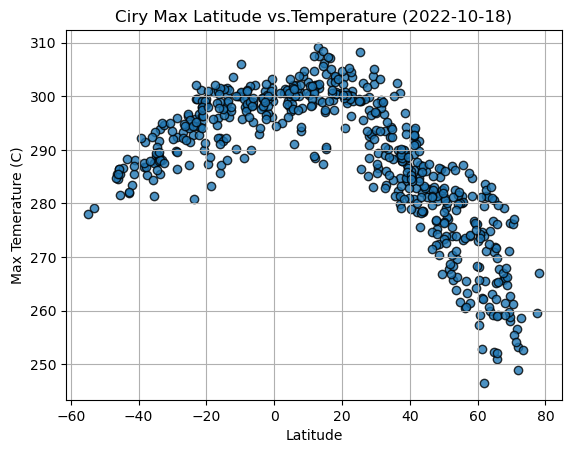

In [13]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black" , alpha = 0.8)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Ciry Max Latitude vs.Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temerature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

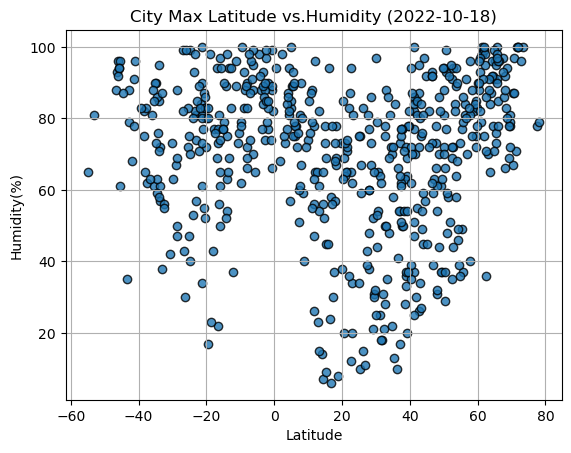

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black" , alpha = 0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs.Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

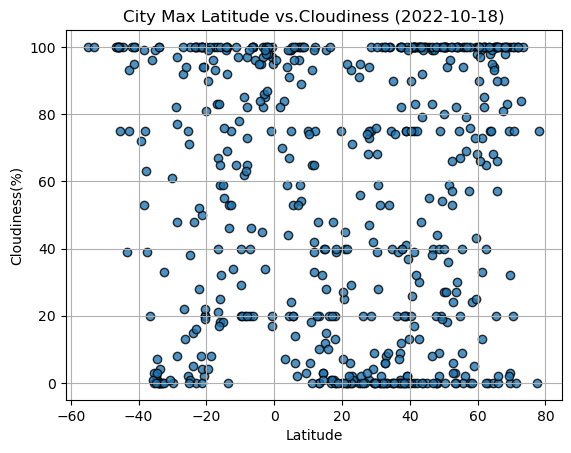

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black" , alpha = 0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs.Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

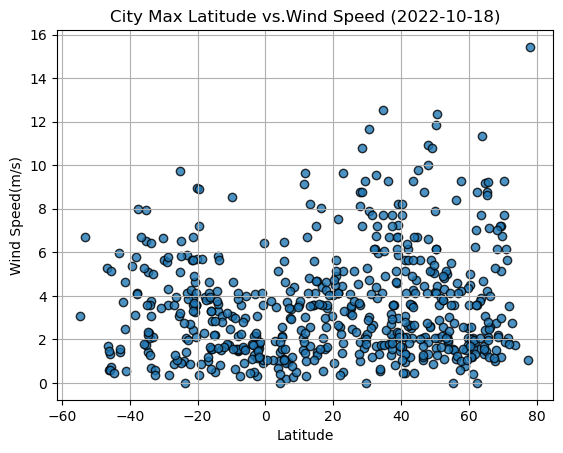

In [16]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black" , alpha = 0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs.Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
c_slope, c_int, c_r, c_p, c_std_err = stats.linregress(city_data_df["Lat"], city_data_df["Max Temp"])
print("max_temp")
print(c_slope, c_int, c_r, c_p, c_std_err)

max_temp
-0.23693202328791313 292.86141731071154 -0.6177848853226111 1.2010094542103738e-62 0.012511596607178203


In [18]:
reg_value = c_slope*city_data_df["Max Temp"] + c_int
reg_value

City_ID
0      224.497051
1      232.953155
2      229.887255
3      232.882076
4      225.150984
          ...    
578    222.705845
579    225.143876
580    231.905916
581    226.859264
582    221.028366
Name: Max Temp, Length: 583, dtype: float64

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0            xichang  27.8964  102.2634    288.54        77           1   
1        yerbogachen  61.2767  108.0108    252.85       100          13   
2            batagay  67.6333  134.6333    265.79        97         100   
3           khatanga  71.9667  102.5000    253.15       100         100   
4               roma  43.2128  -75.4557    285.78        75         100   

         Wind Speed Country        Date  
City_ID                                  
0              1.01      CN  1681763787  
1              0.43      RU  1681763787  
2              1.00      RU  1681763787  
3              3.54      RU  1681763787  
4              2.06      US  1681763788

In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                    
5           geraldton -28.7667  114.6000    286.38        88          77   
8            souillac -20.5167   57.5167    298.36        83          20   
9        port lincoln -34.7333  135.8667    288.92        90           2   
10       jacareacanga  -6.2222  -57.7528    298.33        95         100   
11            ushuaia -54.8000  -68.3000    277.96        65         100   

         Wind Speed Country        Date  
City_ID                                  
5              3.60      AU  1681763789  
8              3.60      MU  1681763790  
9              5.08      AU  1681763791  
10             1.57      BR  1681763791  
11             3.09      AR  1681763501

###  Temperature vs. Latitude Linear Regression Plot

In [21]:
northern_hemi_lat_frame =northern_hemi_df["Lat"].to_frame()
northern_hemi_lat_frame

Lat
City_ID         
0        27.8964
1        61.2767
2        67.6333
3        71.9667
4        43.2128
...          ...
577      49.7834
579      43.5547
580      60.3400
581      43.6475
582      18.7369

[397 rows x 1 columns]

In [22]:
northern_hemi_temp_frame = northern_hemi_df["Max Temp"].to_frame()
northern_hemi_temp_frame

Max Temp
City_ID          
0          288.54
1          252.85
2          265.79
3          253.15
4          285.78
...           ...
577        282.03
579        285.81
580        257.27
581        278.57
582        303.18

[397 rows x 1 columns]

In [23]:
northern_hemi_df["Lat"]

City_ID
0      27.8964
1      61.2767
2      67.6333
3      71.9667
4      43.2128
        ...   
577    49.7834
579    43.5547
580    60.3400
581    43.6475
582    18.7369
Name: Lat, Length: 397, dtype: float64

In [24]:
northern_hemi_df["Max Temp"]

City_ID
0      288.54
1      252.85
2      265.79
3      253.15
4      285.78
        ...  
577    282.03
579    285.81
580    257.27
581    278.57
582    303.18
Name: Max Temp, Length: 397, dtype: float64

In [25]:
mn_slope, mn_int, mn_r, mn_p, mn_std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
ms_slope, ms_int, ms_r, ms_p, ms_std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
print("max_temp_north")
print(mn_slope, mn_int, mn_r, mn_p, mn_std_err)
print("max_temp_south")
print(ms_slope, ms_int, ms_r, ms_p, ms_std_err)

max_temp_north
-0.6204814290407408 309.464169742702 -0.8716030594818737 2.3145461732243927e-124 0.017558835278840203
max_temp_south
0.33765077012753814 301.2643785717281 0.7579357573068394 5.6168232159185326e-36 0.021423639769488582


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=20,color="red")
#plt.text (30, 260, "test" 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


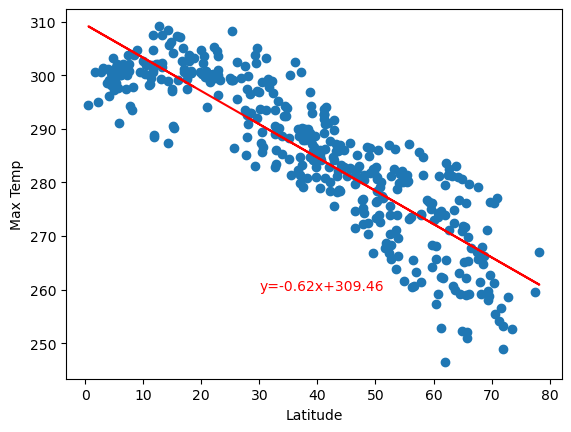

In [30]:
# # Linear regression on Northern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0, 1]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))
#plt.annotate(f"y= {round(mn_slope,2)}x+mn_int)", (6,1), color='red')

In [33]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (-50, 295, f"y={round(ms_slope,2)}x+{round(ms_int,2)}", fontsize=14, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


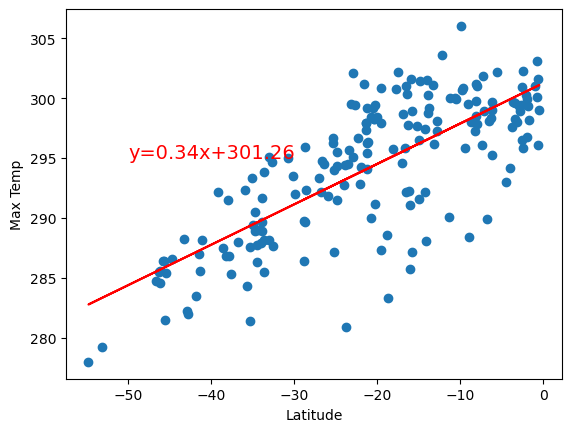

In [34]:
# Linear regression on Southern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])[0, 1]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

**Discussion about the linear relationship: 
For the northern hemisphere scatter plot it implies a negative correlation between the Latitude and the Max_temp. It shows a negative slope which means as the latitude increases the temperature decreases. (strong relation)
For the southern hemisphere there is positive correlation which means as the latitude decreases the temperature decreases as well and vice verse.  (strong relation)

### Humidity vs. Latitude Linear Regression Plot

In [35]:
hn_slope, hn_int, hn_r, hn_p, hn_std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
hs_slope, hs_int, hs_r, hs_p, hs_std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
print("humidity_north")
print(hn_slope, hn_int, hn_r, hn_p, hn_std_err)
print("humidity_south")
print(hs_slope, hs_int, hs_r, hs_p, hs_std_err)

humidity_north
0.3305862511456239 54.68947547545897 0.28336908066297434 9.111334695031979e-09 0.05629338129335646
humidity_south
0.19211021354110258 80.54776904357253 0.14726755742151107 0.04486987454731087 0.09512029949704057


In [40]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (50, 20, f"y={round(hn_slope,2)}x+{round(hn_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


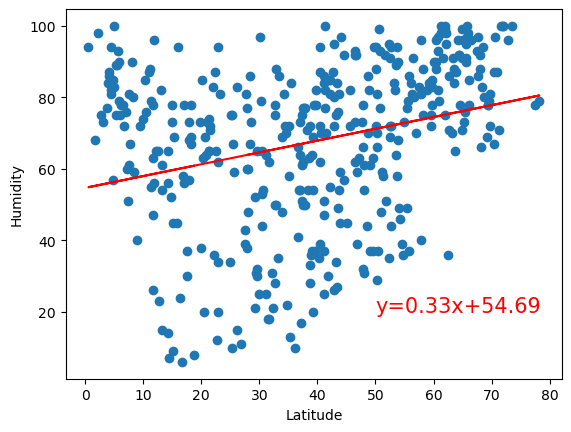

In [41]:
# Northern Hemisphere
# # Linear regression on Northern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])[0, 1]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (-50, 40, f"y={round(hs_slope,2)}x+{round(hs_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


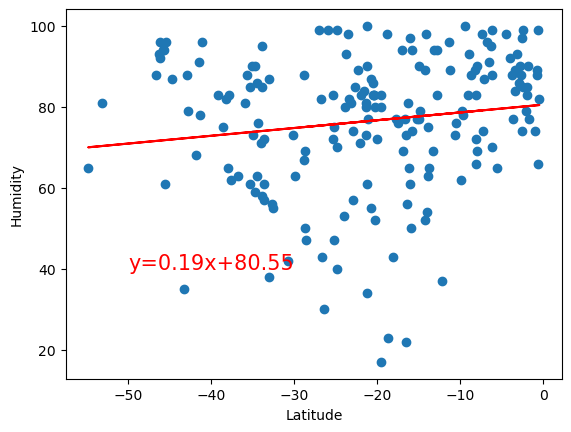

In [45]:
# Southern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])[0, 1]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

**Discussion about the linear relationship: For the northern hemisphere, there is moderate positive relation. There are also two clusters on the top right and left. for the southeren hemisphere there is a weak negative relation and there is also gap in values.

### Cloudiness vs. Latitude Linear Regression Plot

In [46]:
cn_slope, cn_int, cn_r, cn_p, cn_std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
cs_slope, cs_int, cs_r, cs_p, cs_std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
print("cloud_north")
print(cn_slope, cn_int, cn_r, cn_p, cn_std_err)
print("cloud_south")
print(cs_slope, cs_int, cs_r, cs_p, cs_std_err)

cloud_north
0.4513928983484213 34.934305205143765 0.21975630822808967 9.91859086115781e-06 0.10082459663410655
cloud_south
0.34479113871300104 67.86167671253011 0.11798720766541002 0.1087381652265051 0.21392824102568167


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (50, 20, f"y={round(cn_slope,2)}x+{round(cn_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


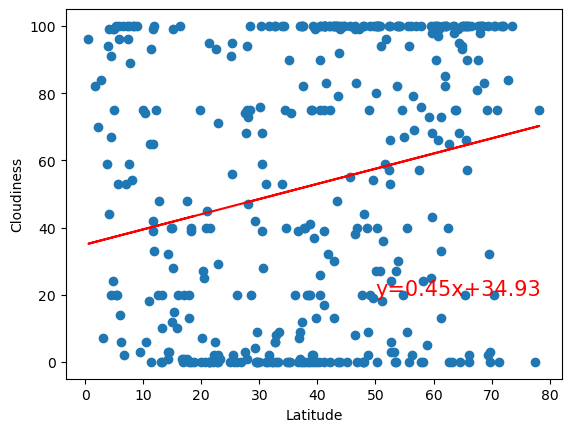

In [48]:
# Northern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])[0, 1]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

In [51]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (-50, 20, f"y={round(cs_slope,2)}x+{round(cs_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


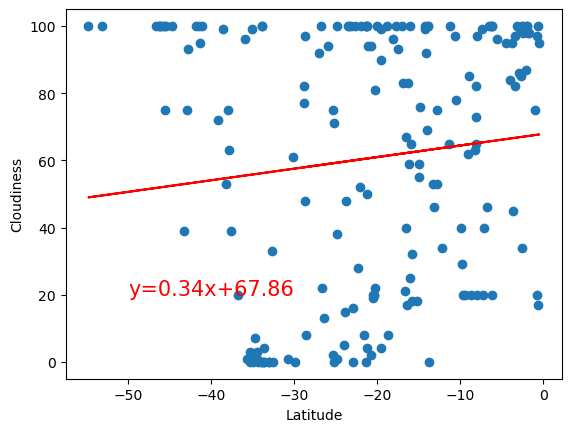

In [52]:
# Southern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])[0, 1]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

**Discussion about the linear relationship: In both plots, there is a noticeable relationship between the two variables being plotted, but the relationship is not extremely strong. In the southeren hemisphere, the scatter plot is not clustered tightly around a straight line, and there is gap in the values. There is also two data clusters showing northern hemisphere plot, it's displayed on the bottom and the top of the grapgh. For the southeren hemisphere plot, there are few data clusters on the top and a bit on the bottom.

### Wind Speed vs. Latitude Linear Regression Plot

In [53]:
wn_slope, wn_int, wn_r, wn_p, wn_std_err = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
ws_slope, ws_int, ws_r, ws_p, ws_std_err = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print("wind_speed_north")
print(wn_slope, wn_int, wn_r, wn_p, wn_std_err)
print("wind_speed_south")
print(ws_slope, ws_int, ws_r, ws_p, ws_std_err)

wind_speed_north
0.013703127852028506 3.2126156441055356 0.10226601041299527 0.041694859130713045 0.006706669272779961
wind_speed_south
-0.03078962377991122 2.440731170450366 -0.20109162823953983 0.005919500274931619 0.011057018498579891


In [54]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (20,10, f"y={round(wn_slope,2)}x+{round(wn_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


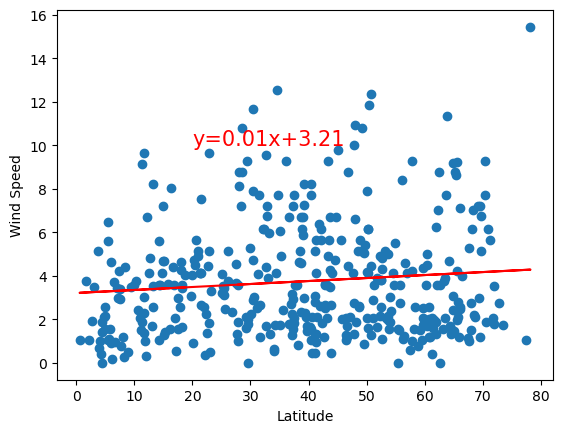

In [55]:
# Northern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])[0, 1]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

In [56]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     plt.annotate(f"y={round(mn_slope,2)}x+{round(mn_int,2)}", (30,260), color='red')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.text (-20,8, f"y={round(ws_slope,2)}x+{round(ws_int,2)}", fontsize=15, color='red') 
    plt.xlabel("Latitude")
    plt.ylabel(title)
    
    plt.show()

The r-value is:
-0.6177848853226111


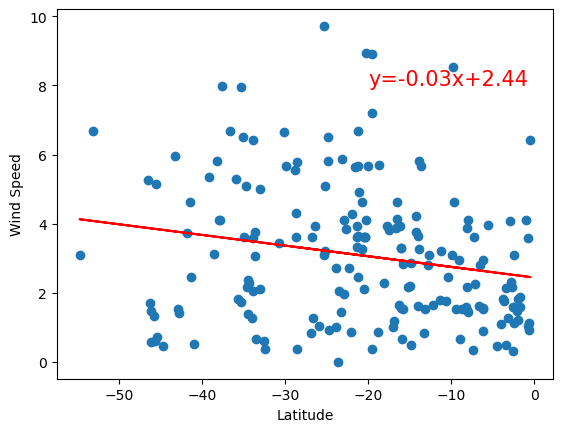

In [57]:
# Southern Hemisphere
print ("The r-value is:")
print(c_r)
r = np.corrcoef(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])[0, 1]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

**Discussion about the linear relationship: for the Northern Hemisphere plot it displays no relationship and there is data cluster at the bottom of the plot whcih can indicate a pattern. For the Southern Hemisphere there is a weak negative relationship therefore there is a slight tendency for one variable to decrease as the other variable increases. The data points tend to cluster around a straight line with a negative slope, but there is a lot of variation in the data.